# First portfolio optimization using Monte-Carlo method

In [21]:
import numpy as  np 
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import yfinance as yf
import random

In [2]:
def get_stocks(tickers, start, end):
    df = yf.download(tickers, start, end)[["Close"]].reset_index()
    df.columns = [col[1] if col[0] == 'Close' else 'Date' for col in df.columns]
    return df

In [5]:
start = datetime.datetime(2023,11,15)
end = datetime.datetime(2025,4,4)

In [6]:
tickers = ["AAPL", "PFE", "WMT", "XOM", "JPM"]

portfolio = get_stocks(tickers, start, end)
portfolio['Date'] = pd.to_datetime(portfolio['Date'])
portfolio.set_index('Date', inplace=True)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


In [10]:
portfolio.head()

,AAPL,JPM,PFE,WMT,XOM
Date,,,,,
2023-11-15,186.887939,144.605560,27.988173,55.563515,99.351974
2023-11-16,188.577805,146.256927,27.598803,51.066853,98.201843
2023-11-17,188.557907,147.579971,27.737864,50.841042,100.597946
2023-11-20,190.307404,148.033844,27.793486,50.824680,100.157074
2023-11-21,189.502243,147.724792,28.090147,51.007950,100.118729


Let us calculated the daily returns for the five stocks in a new dataframe called “returns”. Daily returns are calculated as the percent change in the daily prices.

In [11]:
returns = pd.DataFrame()
for ticker in tickers:
    returns[ticker+' returns'] = portfolio[ticker].pct_change()

In [12]:
returns.head()

,AAPL returns,PFE returns,WMT returns,XOM returns,JPM returns
Date,,,,,
2023-11-15,NaN,NaN,NaN,NaN,NaN
2023-11-16,0.009042,-0.013912,-0.080928,-0.011576,0.011420
2023-11-17,-0.000106,0.005039,-0.004422,0.024400,0.009046
2023-11-20,0.009278,0.002005,-0.000322,-0.004383,0.003075
2023-11-21,-0.004231,0.010674,0.003606,-0.000383,-0.002088


Annual returns for each stock plus covariance matrix

In [13]:
(returns.mean())*252

AAPL returns    0.091131
PFE returns    -0.075551
WMT returns     0.352292
XOM returns     0.110499
JPM returns     0.358157
dtype: float64

In [14]:
returns.cov()*252

,AAPL returns,PFE returns,WMT returns,XOM returns,JPM returns
AAPL returns,0.059909,0.004705,0.007830,0.003668,0.009975
PFE returns,0.004705,0.056035,0.005404,0.007190,0.007719
WMT returns,0.007830,0.005404,0.044733,0.000577,0.009607
XOM returns,0.003668,0.007190,0.000577,0.040341,0.014634
JPM returns,0.009975,0.007719,0.009607,0.014634,0.055544


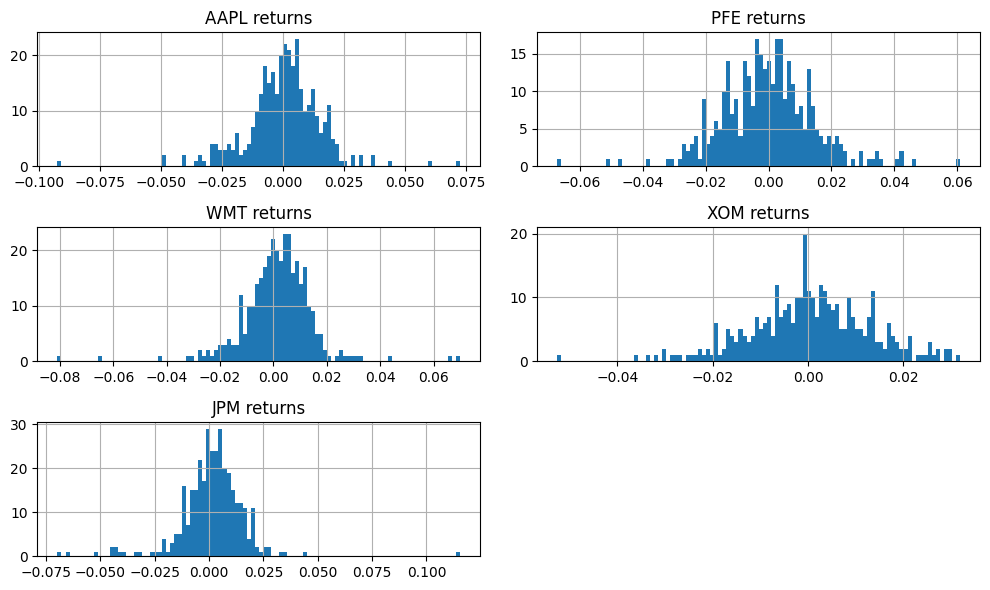

In [19]:
returns.hist(bins=100, figsize=(10,6))
plt.tight_layout()

The distribution of the returns for each stock can be seen in the image above

Now, we will conduct a Monte Carlo optimization method on our portfolio

In [27]:
def monte_carlo_por_opt(tickers, num=1000):
    num_ports = num

    all_weights = np.zeros((num_ports, len(tickers)))  
    return_arr = np.zeros(num_ports)  
    volatility_arr = np.zeros(num_ports)  
    sharpe_arr = np.zeros(num_ports) 

    for i in range(num_ports):  
        # Weights  
        weights = np.array(np.random.random(5))  
        weights = weights / np.sum(weights)  # normalization - ensuring that all weights sum up to 1
        all_weights[i, :] = weights  
        
        # Expected return  
        return_arr[i] = np.sum(returns.mean() * 252 * weights)  
        
        # Expected Volatility  
        volatility_arr[i] = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))  # calculating volatility as it is from formula
        
        # Sharpe ratio  
        sharpe_arr[i] = (return_arr[i] - 0.075) / volatility_arr[i]   

    return sharpe_arr.max(), sharpe_arr.argmax(), all_weights[sharpe_arr.argmax(), :]

In [28]:
monte_carlo_por_opt(tickers, 2000)

(1.5271772371721155,
 87,
 array([0.06152489, 0.03128803, 0.59654513, 0.01665365, 0.2939883 ]))